In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons,make_circles,make_classification

In [33]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [67]:
class neural_network:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,X):
        
        
        z1=np.dot(X,self.model["W1"])+self.model["b1"]
        a1=np.tanh(z1)
        
        z2=np.dot(a1,self.model["W2"])+self.model["b2"]
        a2=np.tanh(z2)
        
        z3=np.dot(a2,self.model["W3"])+self.model["b3"]
        y_=softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        
        return y_
    
    def backward(self,X,Y,lrate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,Y_ = self.activation_outputs
        
        delta3=Y_-Y
        dellw3=np.dot(a2.T,delta3)
        dellb3=np.sum(delta3,axis=0)
        
        delta2=np.dot(delta3,W3.T)*(1-np.square(a2))
        dellw2=np.dot(a1.T,delta2)
        dellb2=np.sum(delta2,axis=0)
        
        delta1=np.dot(delta2,W2.T)*(1-np.square(a1))
        dellw1=np.dot(X.T,delta1)
        dellb1=np.sum(delta1,axis=0)
        
        self.model['W1'] -= lrate*dellw1
        self.model['W2'] -= lrate*dellw2
        self.model['W3'] -= lrate*dellw3
        
        self.model['b1'] -= lrate*dellb1
        self.model['b2'] -= lrate*dellb2
        self.model['b3'] -= lrate*dellb3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)  

In [68]:
model = neural_network(input_size=2,layers=[4,3],output_size=2)

In [69]:
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [70]:
def train(X,Y,model,epocks=500):

    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for i in range(epocks):
        model.forward(X)
        model.backward(X,Y_OHT)


In [71]:
X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)

In [72]:
train(X,Y,model)

In [81]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.4000


In [95]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)

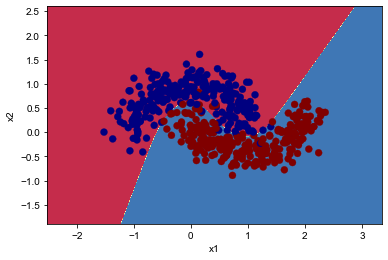

In [96]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)